In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
import collections
from collections import Counter

In [2]:
# Importing the dataset
data = pd.read_csv("data.csv")

# Data Analysis

In [3]:
# Printing the 1st 5 columns
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# get the dimenions of data
data.shape

(569, 33)

In [5]:
# get the columns list or feature names present in dataset
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# Target Variable:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
#get the datatype of columns:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## Missing Values

In [8]:
# Check for null values:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#drop the unnamed column:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [10]:
# statistics of our data:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# DATA VISUALIZATION

In [11]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(30, 30)

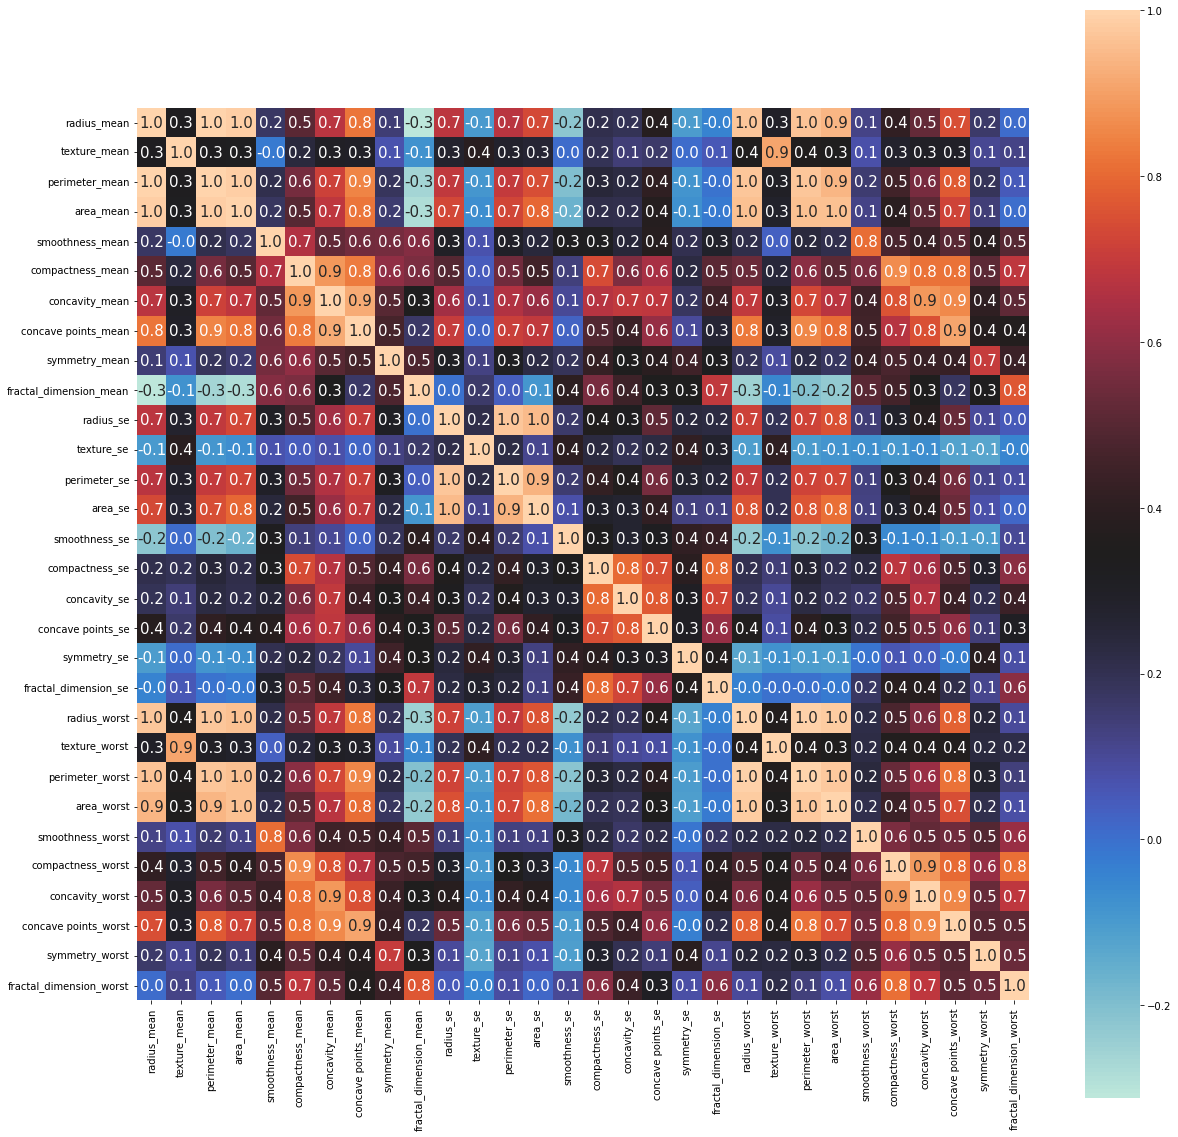

In [12]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='icefire')
plt.show()

C:\Users\gbrev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


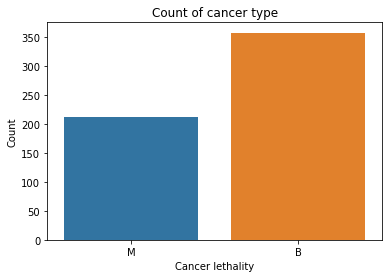

In [13]:
# Analyzing the target variable

plt.title('Count of cancer type')
sns.countplot(data['diagnosis'])
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

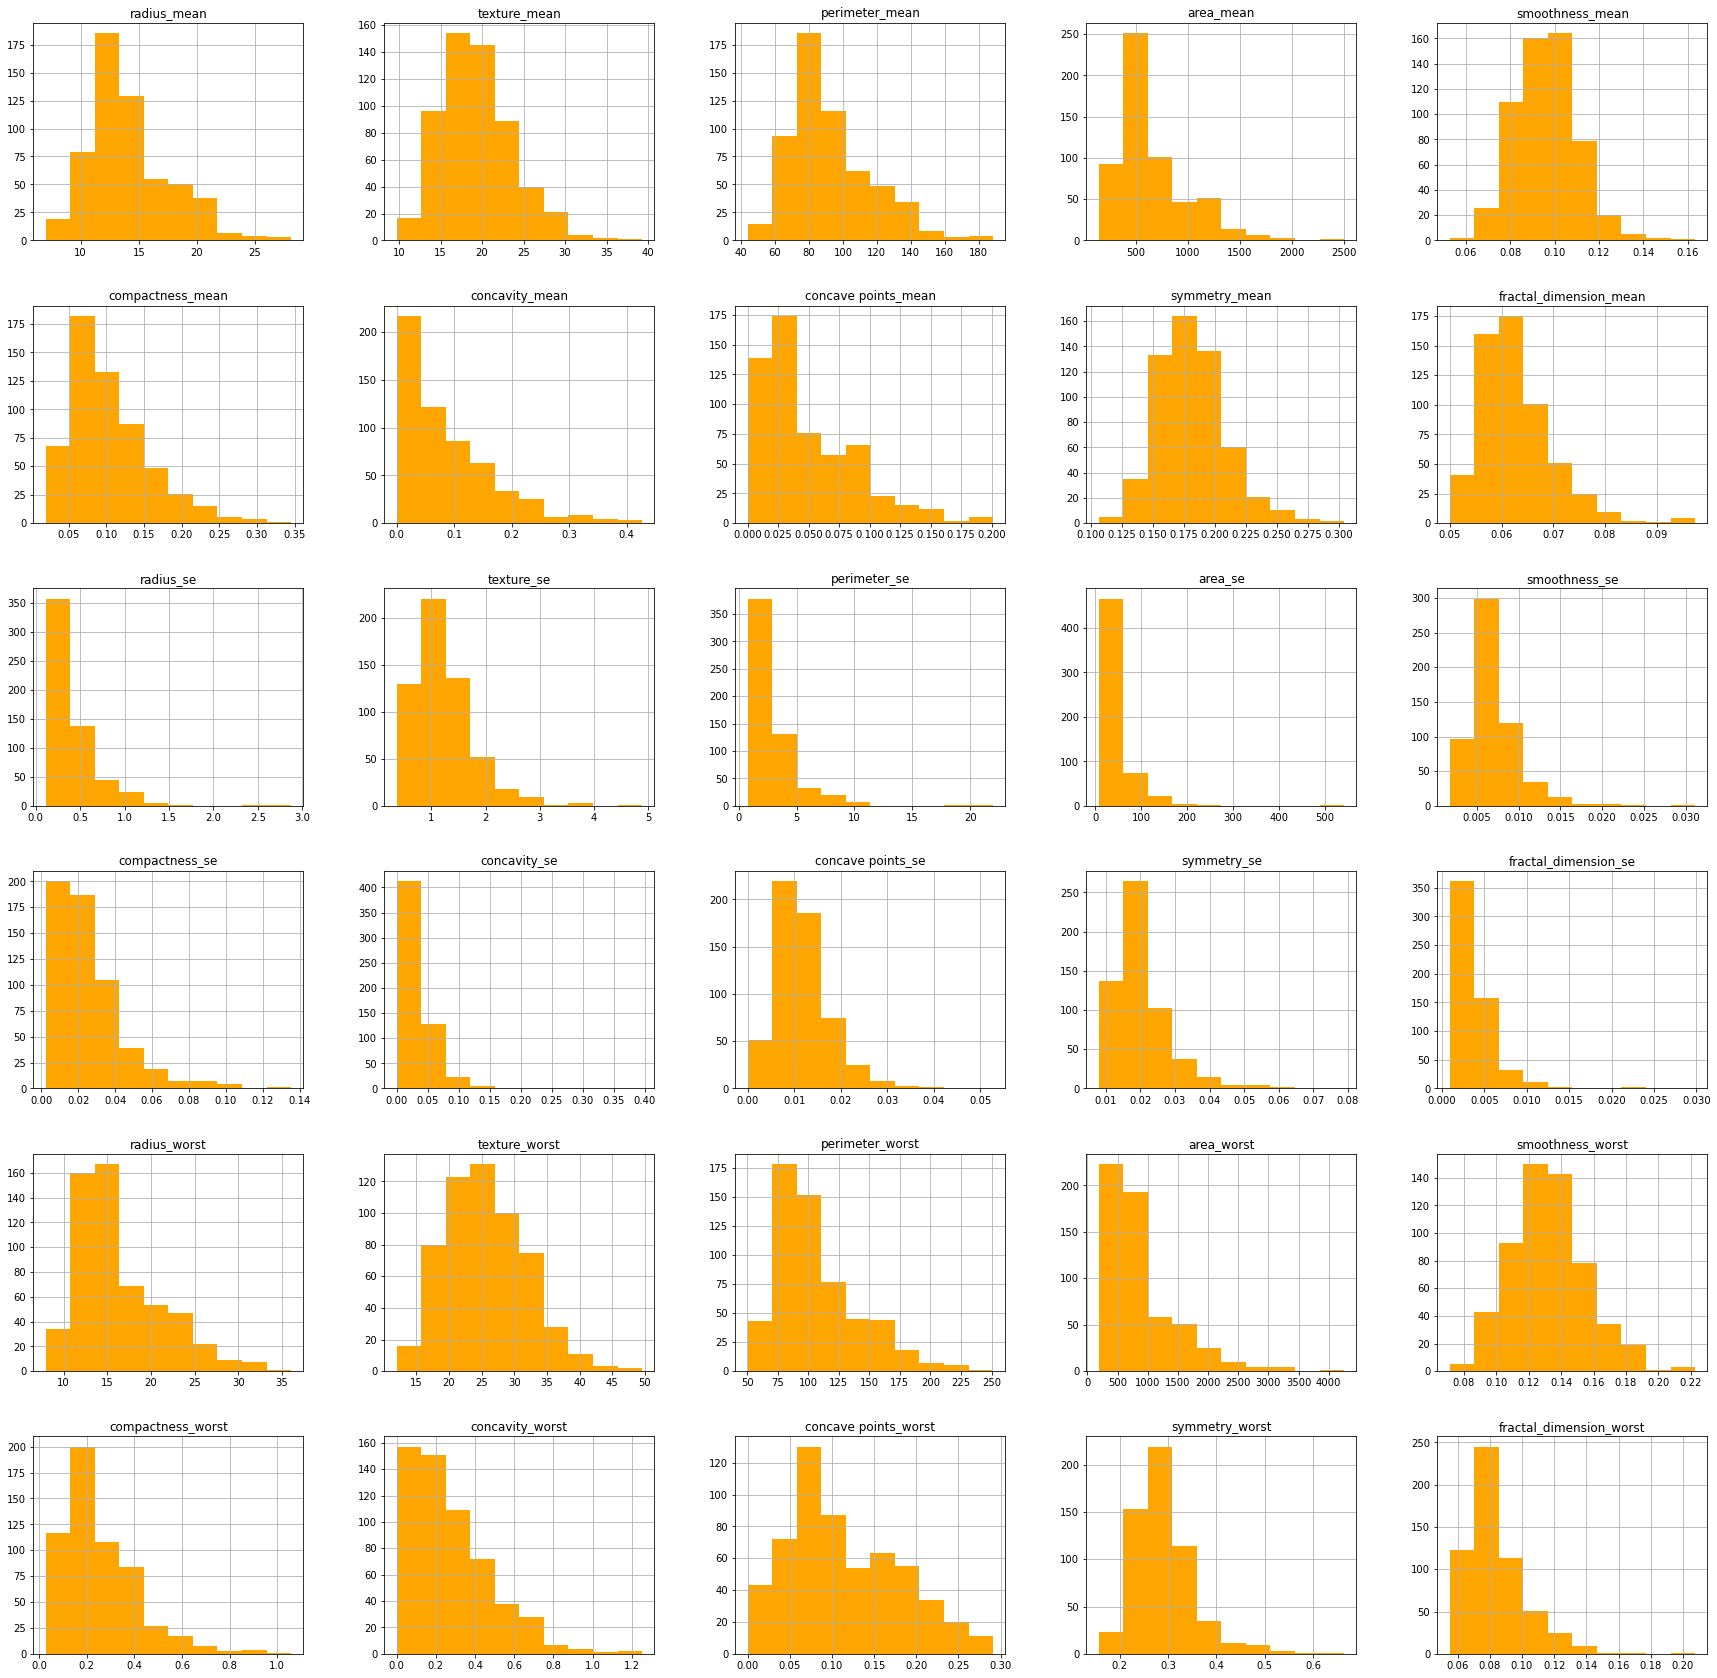

In [14]:
#plot the histograms for each feature:
data.hist(figsize = (30,30), color = 'orange')
plt.show()

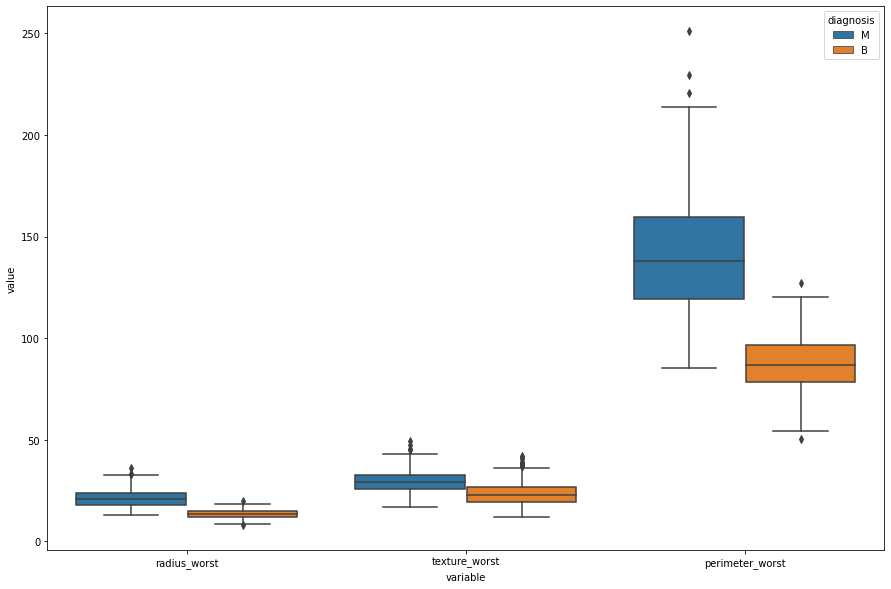

In [15]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_worst', 'texture_worst', 'perimeter_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [16]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

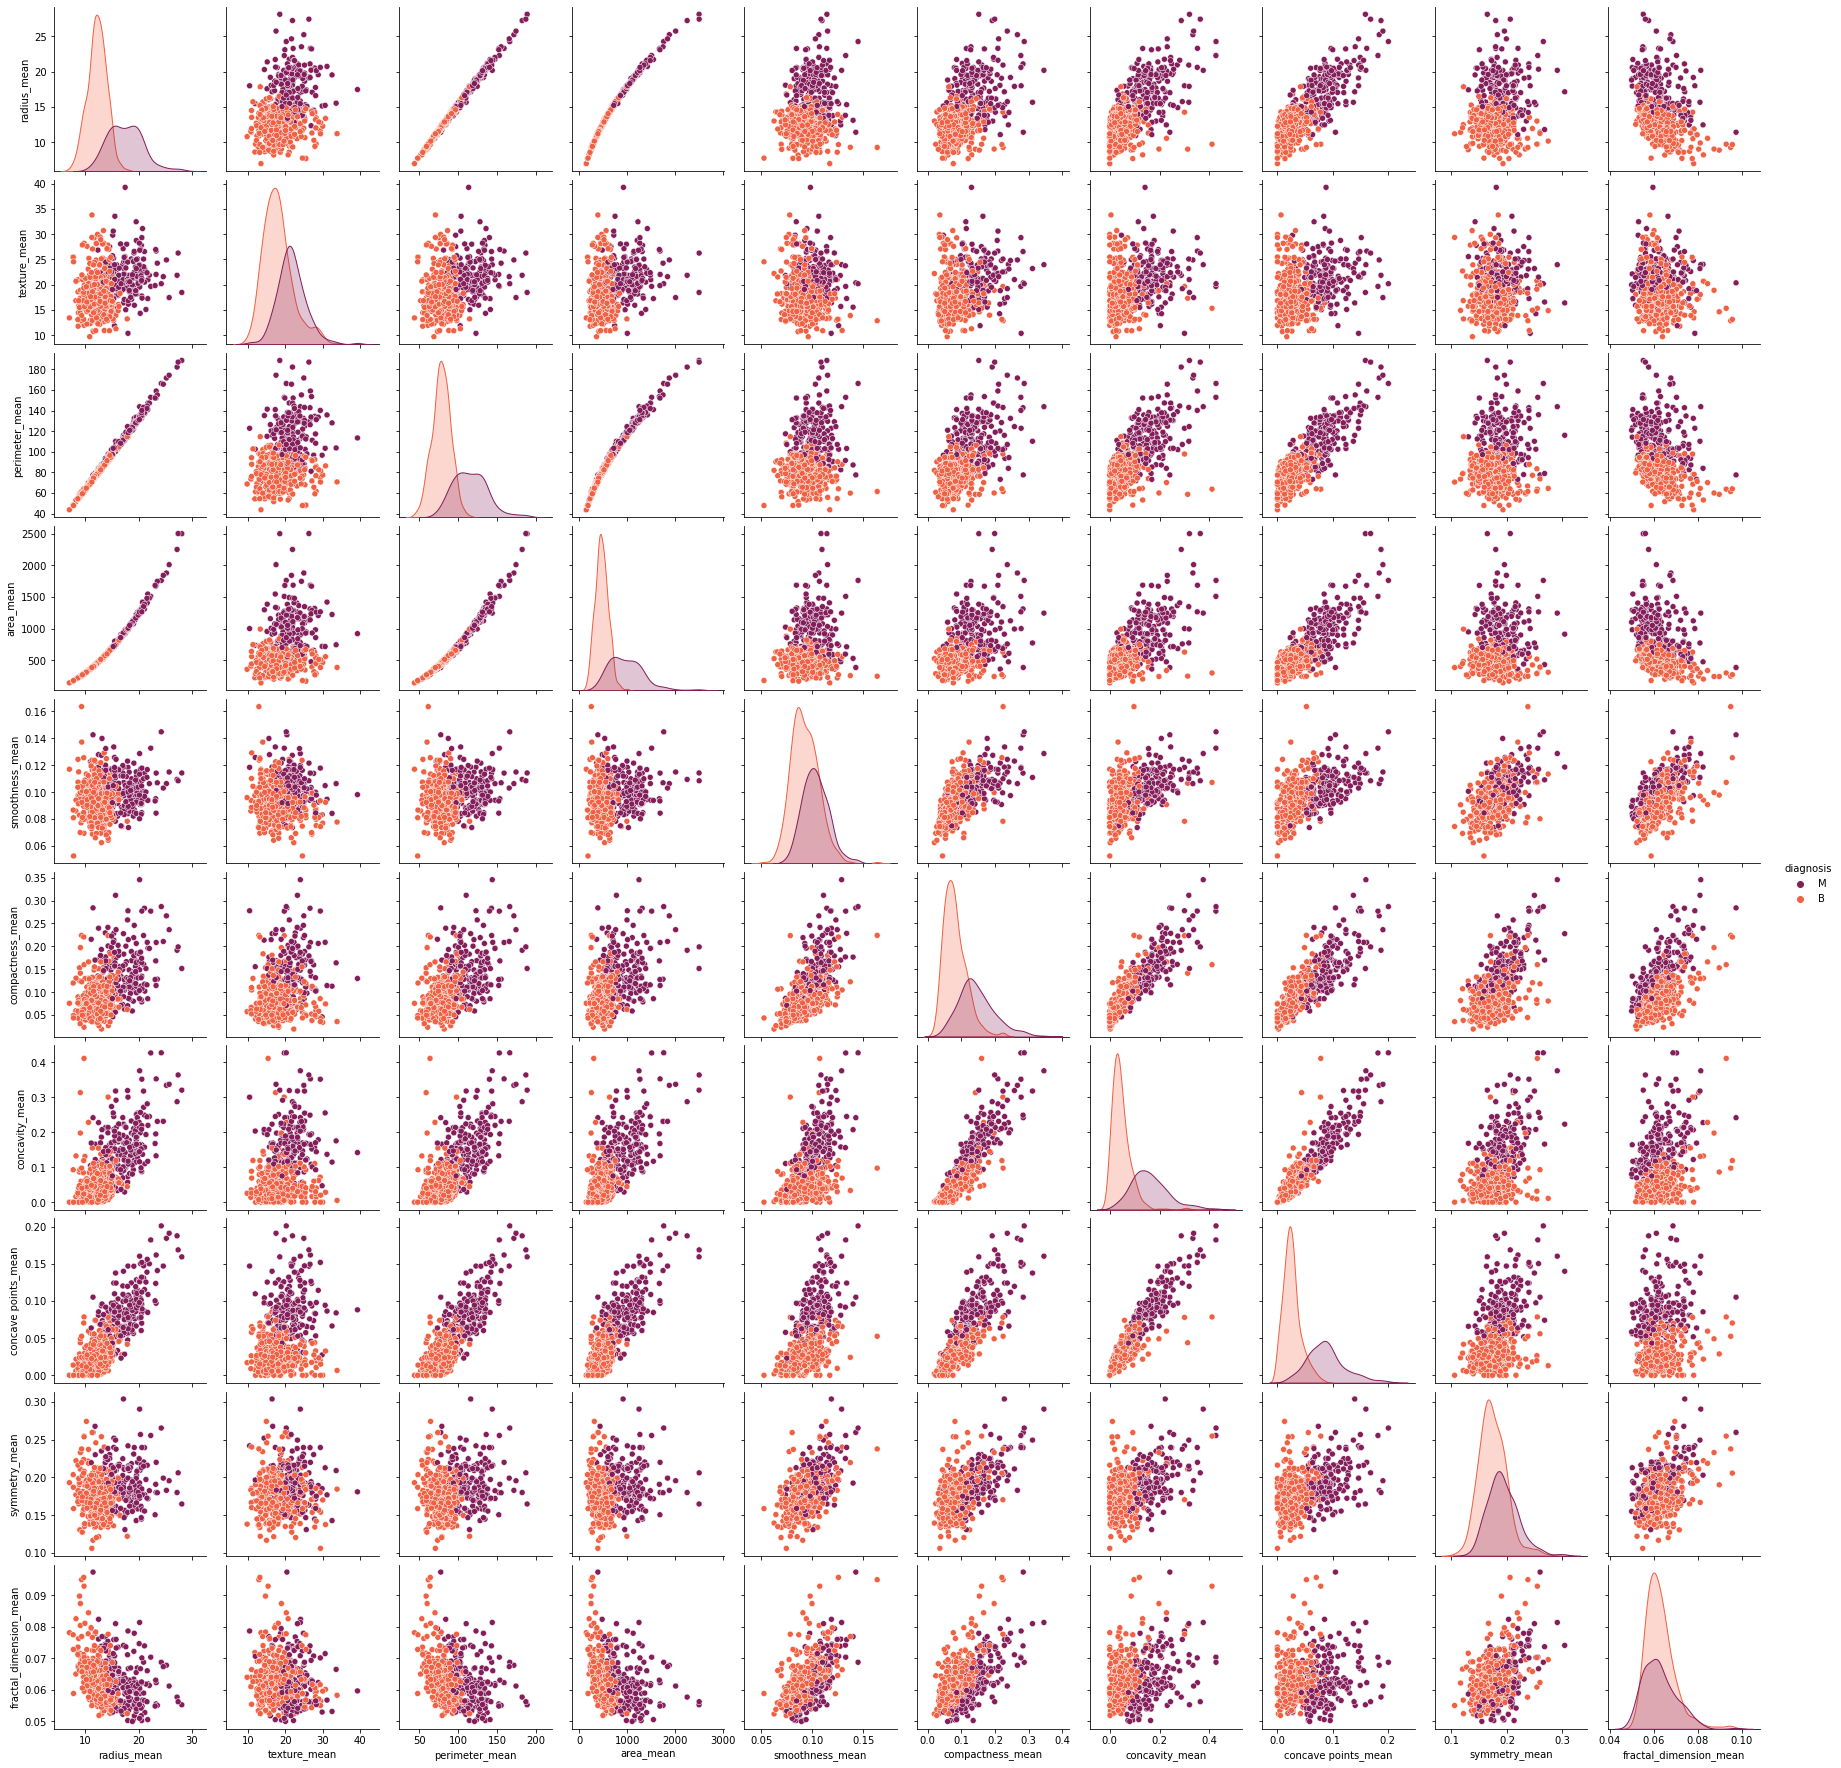

In [17]:
#generate a scatter plot with the following columns:

columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data=data[columns], hue="diagnosis", palette='rocket')

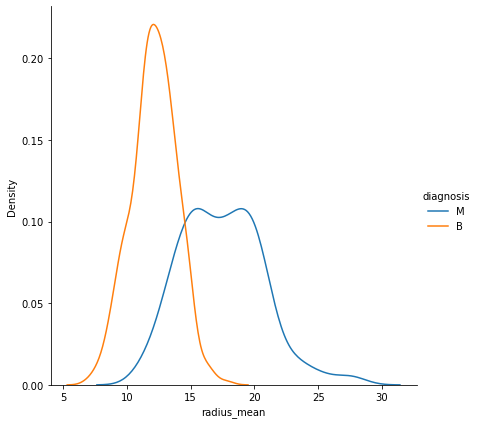

In [18]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(data, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

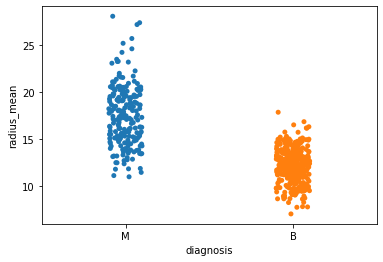

In [19]:
# Plotting the distribution of the mean radius
sns.stripplot(x="diagnosis", y="radius_mean", data=data, jitter=True, edgecolor="gray")
plt.show()

# TRAIN TEST SPLIT

In [20]:
# Spliting target variable and independent variables
#data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']


In [21]:
print('Before balancing',Counter(y))

Before balancing Counter({'B': 357, 'M': 212})


In [22]:
# Balancing the dataset
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [23]:
print('After balancing',Counter(y))

After balancing Counter({'M': 357, 'B': 357})


In [24]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of training set:", X_test.shape)

Size of training set: (499, 30)
Size of training set: (215, 30)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)


# PCA

In [26]:
from sklearn.decomposition import PCA


n_components =20


pca = PCA(n_components)
pca.fit(X_train)

pc_train = pd.DataFrame(pca.transform(X_train), columns=["PC" + str(i + 1) for i in range(n_components)])
pc_test = pd.DataFrame(pca.transform(X_test), columns=["PC" + str(i + 1) for i in range(n_components)])

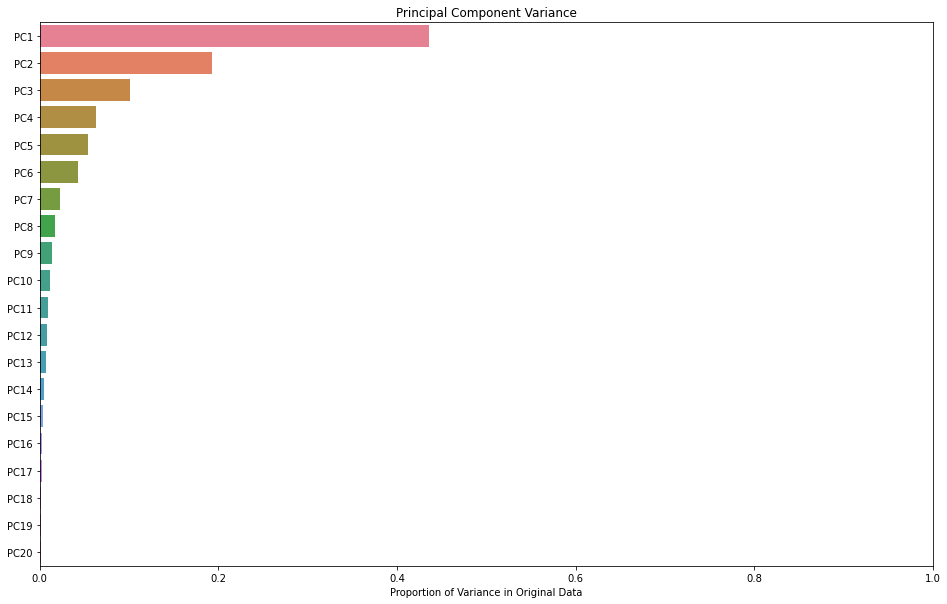

In [27]:
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i + 1) for i in range(n_components)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

# Random Forest Model

In [28]:
# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=3, n_estimators=15)

In [29]:
# Prediction on test data
RF_pred = rf.predict(X_test)

Accuracy of Random Forest model :  96.28


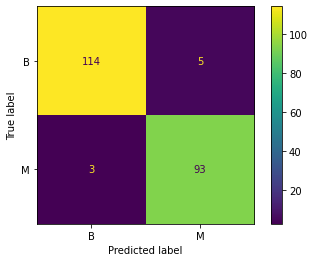

In [30]:
from sklearn import metrics
# Calculating the accuracy
acc_RF = round( metrics.accuracy_score(y_test, RF_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_RF )
cm = confusion_matrix(y_test, RF_pred, labels=['B','M'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['B','M'])
disp.plot()

plt.show()

In [31]:
print('Random Forest model')
print(classification_report(y_test, RF_pred))

Random Forest model
              precision    recall  f1-score   support

           B       0.97      0.96      0.97       119
           M       0.95      0.97      0.96        96

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



# Support Vector Machine

In [32]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [{
    'C': [1, 10, 100, 1000], 
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': [0.001, 0.0001]
},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)
print(grid_obj.best_estimator_)

SVC(C=10, gamma=0.001)


In [34]:
# Prediction on test data
svc_pred = svc.predict(X_test)

In [35]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, svc_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  98.14


Confusion Matrix: SVM model


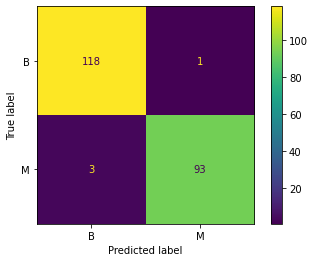

In [36]:
print('Confusion Matrix: SVM model')
cm = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['B','M'])
disp.plot()

plt.show()

In [37]:
print('Classification Report: SVM model')
print(classification_report(y_test, svc_pred))

Classification Report: SVM model
              precision    recall  f1-score   support

           B       0.98      0.99      0.98       119
           M       0.99      0.97      0.98        96

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



# Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
acc_LR = round(clf.score(X_test, y_test)*100,2)
print("Accuracy of Logistic", acc_LR)
LR_pred = clf.predict(X_test)

Accuracy of Logistic 97.67


Confusion Matrix: Logistic Regression model


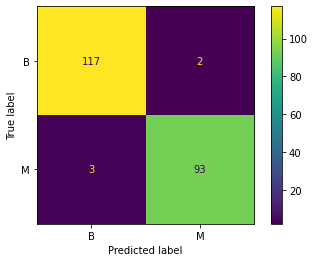

In [39]:
print('Confusion Matrix: Logistic Regression model')
cm = confusion_matrix(y_test, LR_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['B','M'])
disp.plot()

plt.show()

In [40]:
print('Logistic model')
print(classification_report(y_test,LR_pred))

Logistic model
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       119
           M       0.98      0.97      0.97        96

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



# Decision Tree

In [41]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the grid of hyperparameter values to search
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,10),
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(2,10)
    
    
}

# Initialize the decision tree model
model = DecisionTreeClassifier()

# Use grid search CV to find the best combination of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)})

In [42]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 6}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=6)
0.943919191919192


In [43]:
DC_model = grid_search.best_estimator_
DC_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=6)

In [44]:
DC_pred = DC_model.predict(X_test)
acc_DC = round(DC_model.score(X_test, y_test)*100,2)

Confusion Matrix: Logistic Regression model


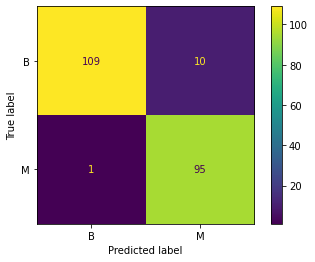

In [45]:
print('Confusion Matrix: Logistic Regression model')
cm = confusion_matrix(y_test, DC_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['B','M'])
disp.plot()

plt.show()

# ANN Model

In [46]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [47]:
classifier = Sequential()

#Input and 1st Hidden Layer
classifier.add(Dense(units = 30,
                     activation = 'relu',
                     kernel_initializer = 'uniform',
                     input_dim = 30))
classifier.add(Dropout(rate = 0.1))


#2nd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(rate = 0.1))   


#3rd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(rate = 0.2))               

#Output Layer
classifier.add(Dense(units = 1,
                     activation = 'sigmoid',
                     kernel_initializer = 'uniform'))
               
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy']) 
classifier.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [48]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)

encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)

In [49]:
#training our ANN Model
history = classifier.fit(X_train, 
                         encoded_y_train, 
                         batch_size = 8, 
                         epochs = 100, 
                         validation_split=0.15)

Epoch 1/100
53/53 [==============================] - 1s 7ms/step - loss: 0.6820 - accuracy: 0.8019 - val_loss: 0.6259 - val_accuracy: 0.9600
Epoch 2/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.9269 - val_loss: 0.1446 - val_accuracy: 0.9467
Epoch 3/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9387 - val_loss: 0.0863 - val_accuracy: 0.9600
Epoch 4/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9670 - val_loss: 0.0667 - val_accuracy: 0.9867
Epoch 5/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9693 - val_loss: 0.0529 - val_accuracy: 0.9867
Epoch 6/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9764 - val_loss: 0.0502 - val_accuracy: 0.9867
Epoch 7/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9764 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 8/100
5

Epoch 59/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 60/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 61/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9976 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 62/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 63/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 64/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 7.8770e-04 - val_accuracy: 1.0000
Epoch 65/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Ep

In [50]:
# Predicting the Test set results
ann_pred = classifier.predict(X_test)
ann_pred = (ann_pred > 0.5)
_,acc_ann = classifier.evaluate(X_test,encoded_y_test, verbose=0)
acc_ann = round(acc_ann*100,2)

7/7 [==============================] - 0s 2ms/step


In [51]:
encoder.classes_

array(['B', 'M'], dtype=object)

Confusion Matrix: Logistic Regression model


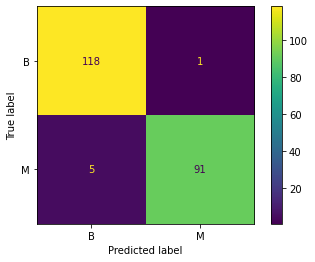

In [52]:
print('Confusion Matrix: Logistic Regression model')
cm = confusion_matrix(encoded_y_test, ann_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['B','M'])
disp.plot()

plt.show()

In [53]:
#Model Evaluation
print('Accuracy Score: ' + str(acc_ann))
print('Precision Score: ' + str(metrics.precision_score(encoded_y_test, ann_pred)))
print('Recall Score: ' + str(metrics.recall_score(encoded_y_test, ann_pred)))
print('F1 Score: ' + str(metrics.f1_score(encoded_y_test, ann_pred)))
print('Classification Report: \n' + str(classification_report(encoded_y_test, ann_pred)))

Accuracy Score: 97.21
Precision Score: 0.9891304347826086
Recall Score: 0.9479166666666666
F1 Score: 0.9680851063829786
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       119
           1       0.99      0.95      0.97        96

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



# Compare accuracy

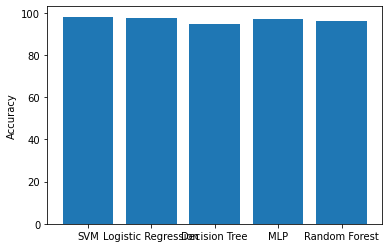

In [54]:
# Create the plot
plt.bar(['SVM', 'Logistic Regression', 'Decision Tree','MLP','Random Forest'], [acc_svm,acc_LR,acc_DC,acc_ann,acc_RF])

# Add a label to the y-axis
plt.ylabel('Accuracy')

# Show the plot
plt.show()
